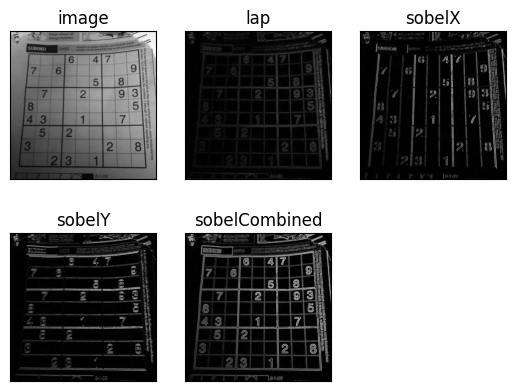

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("sudoku.jpg", cv2.IMREAD_GRAYSCALE)
#to support negative numbers we use this data type float64
#going through the image on the x and y axis, the 2nd derivative is calculated. If there is a harsh 
#zero-crossover, that means that an edge is likely to be located there. Have a look into OneNote for this one
#but essentially f(x) get the intensities. At an edge, the intensities change apruptly. Thus
#the first derivative rises. Then goes back to 0. At that maximum the 2nd derivative equates to zero,
#which causes a zero-crossover
#we do this for the x and y axis for laplacian, and seperately for sobel
lap = cv2.Laplacian(img, cv2.CV_64F, ksize = 3)
lap = np.uint8(np.absolute(lap))

#cv2.Sobel(source, dtype, order of derivative in X direction, ...direction_Y)
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'lap', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]

for i in range(5):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()